In [1]:
from __future__ import print_function, division

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from imageio import imsave,imread
import pandas as pd
import shutil

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import time
import copy
from cutout import Cutout 

from STLData import *
from projectUtil import *
plt.ion() 
%matplotlib inline

sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)


In [2]:
def renameAndOrganize(strDir):
    labelsDict = {1:"airplane",2:"bird",3:"car",4:"cat",5:"deer",6:"dog",7:"horse",8:"monkey",9:"ship",10:"truck"}
    directoryList = [1,2,3,4,5,6,7,8,9,10]
    
    for dir in directoryList:
      os.rename(directory + str(dir), directory + labelsDict.get(dir) + '/')
      shutil.move(directory + labelsDict.get(dir) + '/', directory + strDir + labelsDict.get(dir) + '/')

In [3]:
def displayContrast(meanImg1, meanImg2, meanClass1, meanClass2):
    contrast_mean = meanImg1 - meanImg2
    plt.imshow(contrast_mean, cmap='bwr')
    plt.title(f'Difference Between ' + meanClass1 + ' & ' + meanClass2 + ' Average')
    plt.axis('off')
    plt.show()

In [4]:
imagesList = ""
labels = ""
# download data if needed
if not os.path.isdir('./data/stl10_binary'):
    download_and_extract()

# test to check if the whole dataset is read correctly
imagesList = read_all_images('./data/stl10_binary/train_X.bin')
print(imagesList.shape)

labels = read_labels('./data/stl10_binary/train_y.bin')
print(labels.shape)

if not os.path.isdir('./img/val'):
    # save images to disk
    save_images(imagesList, labels)
    directory = './img/'
    os.makedirs(directory + 'val/')
    renameAndOrganize('val/')

(5000, 96, 96, 3)
(5000,)


In [5]:
testImagesList = read_all_images('./data/stl10_binary/test_X.bin')

testLabels = read_labels('./data/stl10_binary/test_y.bin')

if not os.path.isdir('./img/train'):
    save_images(testImagesList, testLabels)
    directory = './img/'
    os.makedirs(directory + 'train/')
    renameAndOrganize('train/')

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

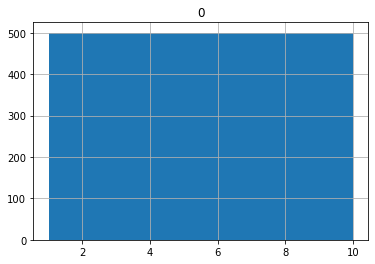

In [6]:
pd.DataFrame(labels).hist()

In [7]:
airplane_images = img2np(imagesList, 'airplane',labels)
bird_images = img2np(imagesList,'bird',labels)
car_images = img2np(imagesList,'car',labels)
cat_images = img2np(imagesList, 'cat',labels)
deer_images = img2np(imagesList, 'deer',labels)
dog_images = img2np(imagesList, 'dog',labels)
horse_images = img2np(imagesList, 'horse',labels)
monkey_images = img2np(imagesList, 'monkey',labels)
ship_images = img2np(imagesList, 'ship',labels)
truck_images = img2np(imagesList, 'truck',labels)

In [8]:
airplane_mean = find_mean_img(airplane_images)
bird_mean = find_mean_img(bird_images)
car_mean = find_mean_img(car_images)
cat_mean = find_mean_img(cat_images)
deer_mean = find_mean_img(deer_images)
dog_mean = find_mean_img(dog_images)
horse_mean = find_mean_img(horse_images)
monkey_mean = find_mean_img(monkey_images)
ship_mean = find_mean_img(ship_images)
truck_mean = find_mean_img(truck_images)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


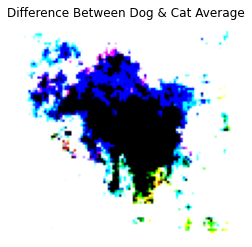

In [9]:
displayContrast(dog_mean, cat_mean, 'Dog', 'Cat')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


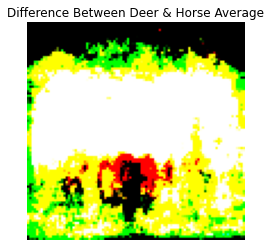

In [10]:
displayContrast(deer_mean, horse_mean, 'Deer', 'Horse')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


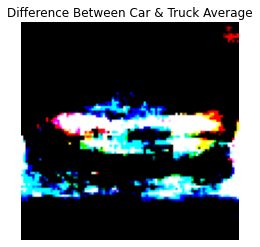

In [11]:
displayContrast(car_mean, truck_mean, 'Car', 'Truck')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


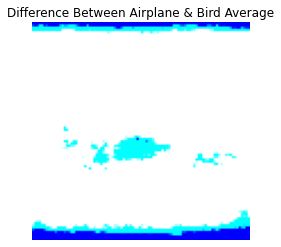

In [12]:
displayContrast(airplane_mean, bird_mean, 'Airplane', 'Bird')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


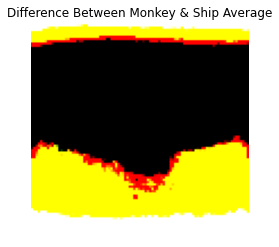

In [13]:
displayContrast(monkey_mean, ship_mean, 'Monkey', 'Ship')

In [14]:
model_ft, criterion, optimizer_ft, exp_lr_scheduler, dataloaders, device, dataset_sizes = defineModel(False)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, dataloaders, device, dataset_sizes,
                       num_epochs=15)

Epoch 0/14
----------
train Loss: 1.2166 Acc: 0.6161
val Loss: 0.5843 Acc: 0.8140

Epoch 1/14
----------
train Loss: 0.6641 Acc: 0.7874
val Loss: 0.4670 Acc: 0.8442

Epoch 2/14
----------
train Loss: 0.4577 Acc: 0.8496
val Loss: 0.5564 Acc: 0.8348

Epoch 3/14
----------
train Loss: 0.3377 Acc: 0.8899
val Loss: 0.5639 Acc: 0.8360

Epoch 4/14
----------
train Loss: 0.2447 Acc: 0.9171
val Loss: 0.5382 Acc: 0.8386

Epoch 5/14
----------
train Loss: 0.1837 Acc: 0.9437
val Loss: 0.5783 Acc: 0.8452

Epoch 6/14
----------
train Loss: 0.1325 Acc: 0.9600
val Loss: 0.4942 Acc: 0.8650

Epoch 7/14
----------
train Loss: 0.0673 Acc: 0.9809
val Loss: 0.4305 Acc: 0.8826

Epoch 8/14
----------
train Loss: 0.0416 Acc: 0.9888
val Loss: 0.3989 Acc: 0.8852

Epoch 9/14
----------
train Loss: 0.0368 Acc: 0.9906
val Loss: 0.4121 Acc: 0.8930

Epoch 10/14
----------
train Loss: 0.0314 Acc: 0.9919
val Loss: 0.4292 Acc: 0.8894

Epoch 11/14
----------
train Loss: 0.0259 Acc: 0.9936
val Loss: 0.4034 Acc: 0.8908

Ep

In [15]:
model_ft, criterion, optimizer_ft, exp_lr_scheduler, dataloaders, device, dataset_sizes = defineModel(True)
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, dataloaders, device, dataset_sizes,
                       num_epochs=15)

Epoch 0/14
----------
train Loss: 1.2118 Acc: 0.6168
val Loss: 0.6373 Acc: 0.8050

Epoch 1/14
----------
train Loss: 0.6742 Acc: 0.7790
val Loss: 0.5340 Acc: 0.8398

Epoch 2/14
----------
train Loss: 0.4814 Acc: 0.8438
val Loss: 0.6091 Acc: 0.8346

Epoch 3/14
----------
train Loss: 0.3733 Acc: 0.8772
val Loss: 0.5518 Acc: 0.8480

Epoch 4/14
----------
train Loss: 0.2822 Acc: 0.9089
val Loss: 0.5271 Acc: 0.8474

Epoch 5/14
----------
train Loss: 0.1987 Acc: 0.9365
val Loss: 0.4748 Acc: 0.8536

Epoch 6/14
----------
train Loss: 0.1647 Acc: 0.9475
val Loss: 0.4886 Acc: 0.8674

Epoch 7/14
----------
train Loss: 0.0736 Acc: 0.9766
val Loss: 0.3732 Acc: 0.8898

Epoch 8/14
----------
train Loss: 0.0430 Acc: 0.9878
val Loss: 0.3517 Acc: 0.8950

Epoch 9/14
----------
train Loss: 0.0374 Acc: 0.9914
val Loss: 0.3486 Acc: 0.9002

Epoch 10/14
----------
train Loss: 0.0327 Acc: 0.9920
val Loss: 0.3560 Acc: 0.8992

Epoch 11/14
----------
train Loss: 0.0295 Acc: 0.9930
val Loss: 0.3585 Acc: 0.8994

Ep